# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [0]:
# TODO: code and runtime results
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd '/content/drive/My Drive/DSF/Homework_2/ieee-fraud-detection/'

/content/drive/My Drive/DSF/Homework_2/ieee-fraud-detection


In [0]:
df_train=pd.read_csv('train_transaction.csv')
df_train_indentity=pd.read_csv('train_identity.csv')
df_test=pd.read_csv('test_transaction.csv')
df_test_indentity=pd.read_csv('test_identity.csv')

In [0]:
df_train_P1=df_train[['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card4',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',]]


df_train_indentity_P1=df_train_indentity[['TransactionID','DeviceType','DeviceInfo']]
df_complete_train_P1 = pd.merge(df_train_P1, df_train_indentity_P1, on='TransactionID', how='outer')


del [[df_train_indentity_P1,df_train_P1]]

In [0]:
df_train_NotFraud=df_complete_train_P1.loc[df_complete_train_P1['isFraud'] == 0]
df_train_Fraud=df_complete_train_P1.loc[df_complete_train_P1['isFraud'] == 1]

In [0]:
print(df_train_Fraud.shape)
print(df_train_NotFraud.shape)

(20663, 15)
(569877, 15)


**Distribution of Transaction Amount**

Text(0.5, 1.0, 'Fraudulent')

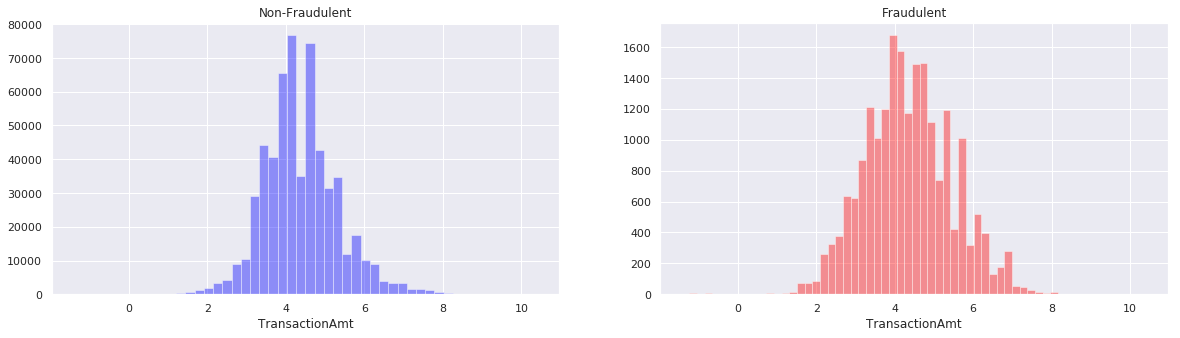

In [0]:
sns.set()
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(np.log(df_train_NotFraud['TransactionAmt']), color='blue',kde=False, ax=ax[0]).set_title('Non-Fraudulent')
sns.distplot(np.log(df_train_Fraud['TransactionAmt']), color='red',kde=False, ax=ax[1]).set_title('Fraudulent')

**Distribution of Products**

Text(0.5, 1.0, 'Fraudulent')

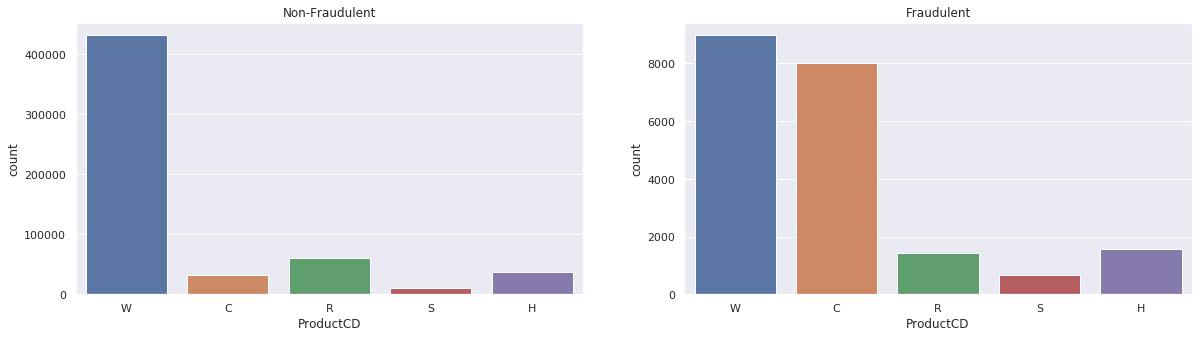

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='ProductCD',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='ProductCD',ax=ax[1]).set_title('Fraudulent')

Product 'W' is most non fraudlent product.

But Product 'W' and 'C' both have high number of Fraudulent cases and therefore there are chances of fraud occuring for these two products. 

**Distribution of 'card6'**

Text(0.5, 1.0, 'Fraudulent')

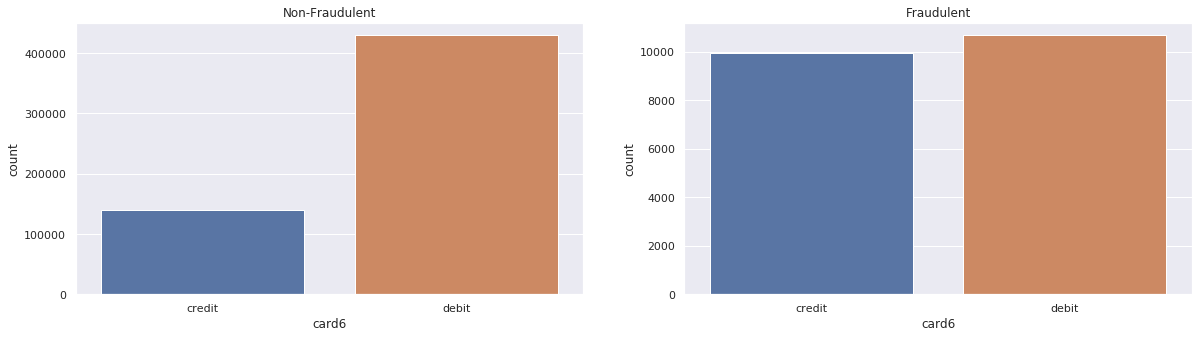

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='card6',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='card6',ax=ax[1]).set_title('Fraudulent')

Debit card is used for most non fraudlent cases.

Debit and Credit cards both have almost equal chances of fraud occurence.

**Distribution of 'card4'**

Text(0.5, 1.0, 'Fraudulent')

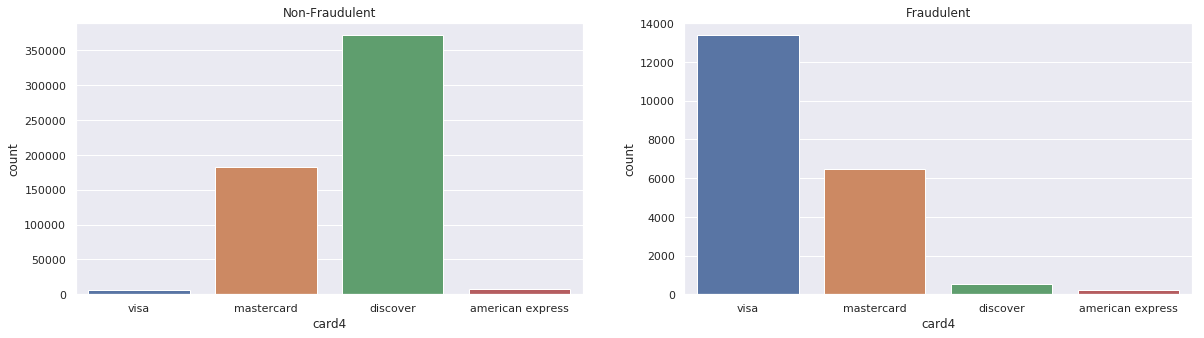

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='card4',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='card4',ax=ax[1]).set_title('Fraudulent')

**Distribution of 'P_emaildomain'**

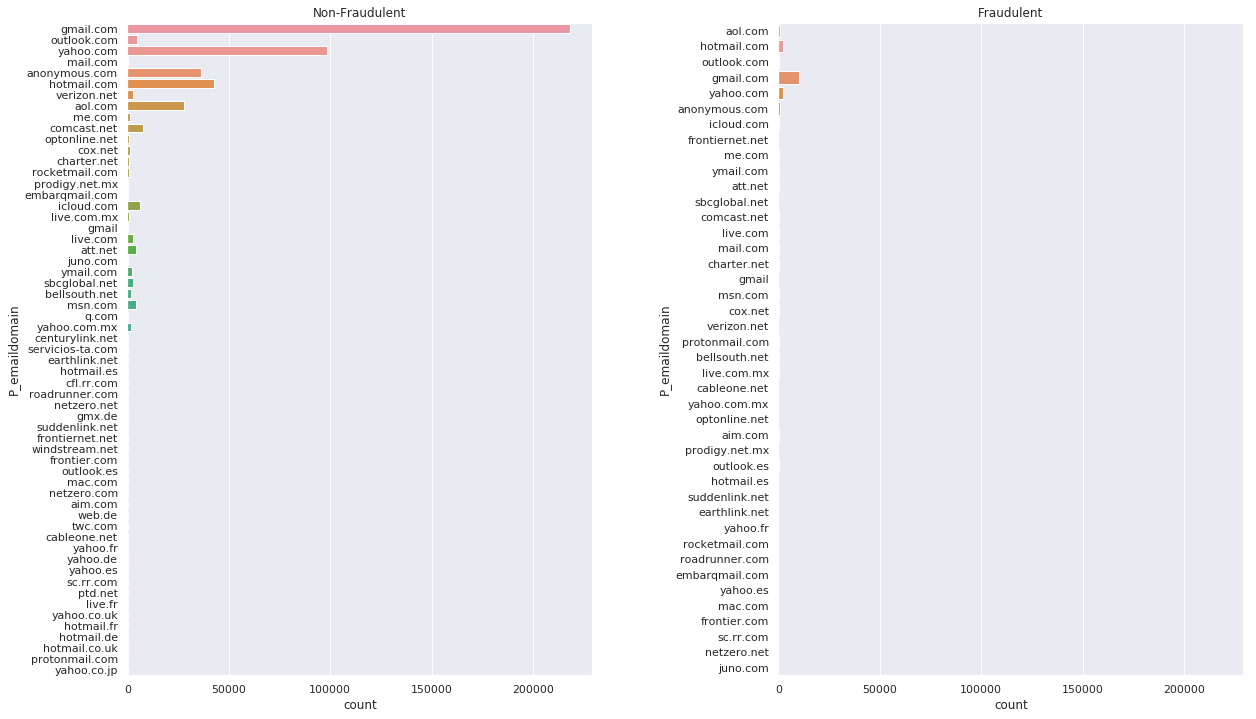

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,12),sharex=True)
sns.countplot(data=df_train_NotFraud,y='P_emaildomain',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='P_emaildomain',ax=ax[1]).set_title('Fraudulent')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

**Distribution of 'R_emaildomain'**

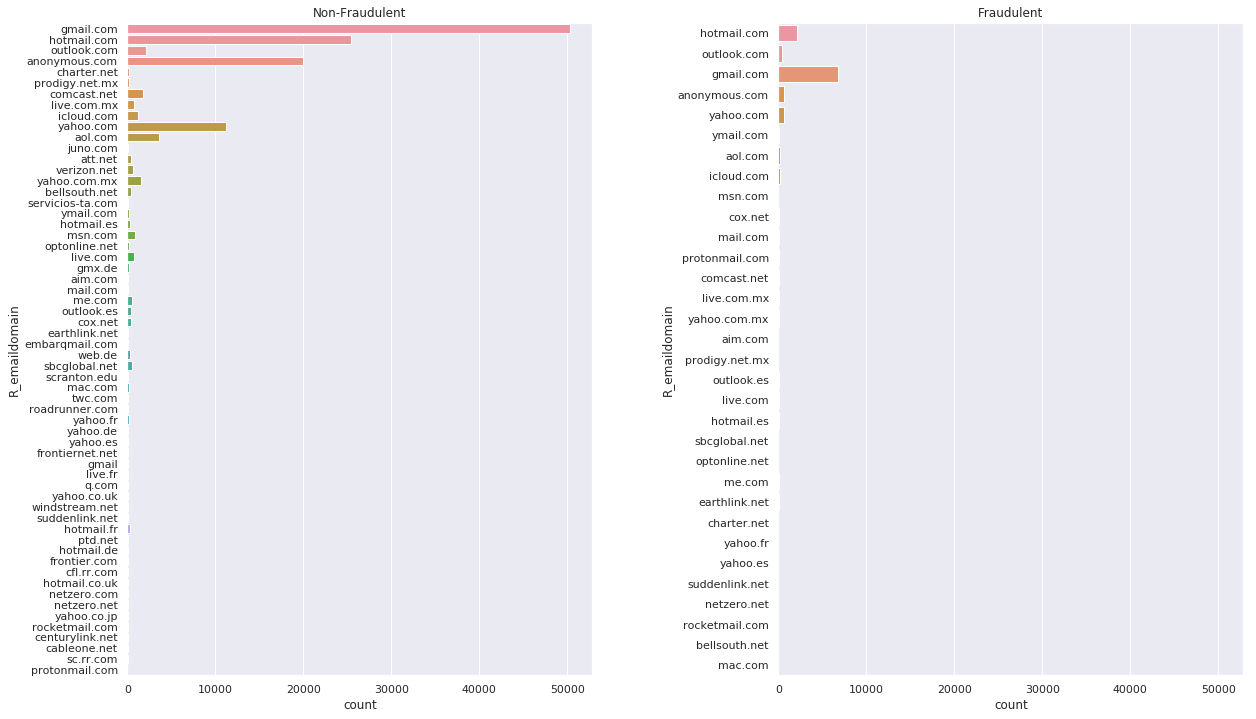

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,12),sharex=True)
sns.countplot(data=df_train_NotFraud,y='R_emaildomain',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='R_emaildomain',ax=ax[1]).set_title('Fraudulent')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

**Distribution of Device Type**

Text(0.5, 1.0, 'Fraudulent')

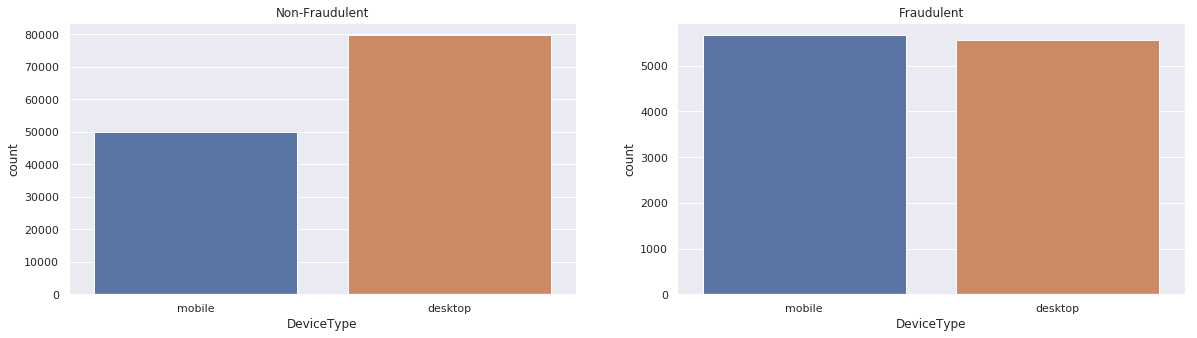

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.countplot(data=df_train_NotFraud,x='DeviceType',ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='DeviceType',ax=ax[1]).set_title('Fraudulent')

Desktop is used for most non fraudlent cases.

Desktop and Mobile device types, both have almost equal chances of fraud occurence.

**Distribution of 'DeviceInfo'**

Text(0.5, 1.0, 'Fraudulent')

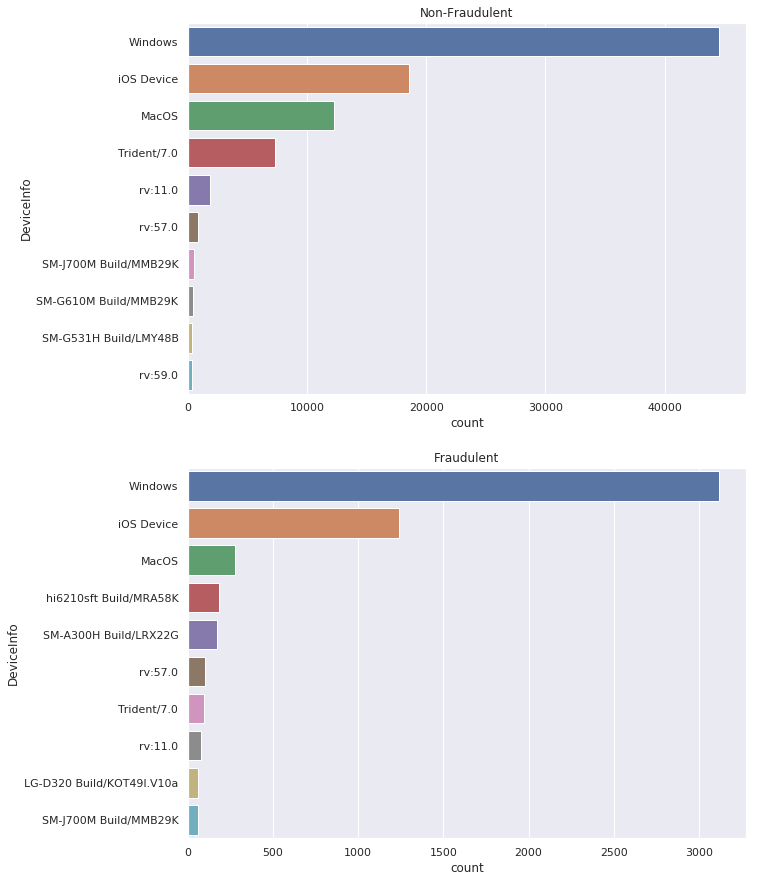

In [0]:
fig, ax =plt.subplots(2,1,figsize=(10,15),sharex=False)
sns.countplot(data=df_train_NotFraud,y='DeviceInfo',
              order=df_train_NotFraud.DeviceInfo.value_counts().iloc[:10].index,ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,y='DeviceInfo',
              order=df_train_Fraud.DeviceInfo.value_counts().iloc[:10].index,ax=ax[1]).set_title('Fraudulent')

**Distribution of 'TransactionDT'**

Text(0.5, 1.0, 'Fraudulent')

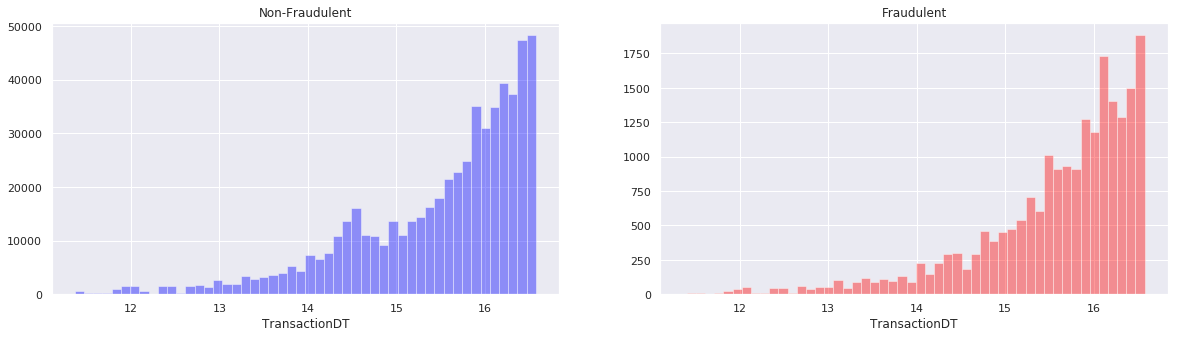

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.distplot(np.log(df_train_NotFraud['TransactionDT']), color='blue',kde=False, ax=ax[0]).set_title('Non-Fraudulent')
sns.distplot(np.log(df_train_Fraud['TransactionDT']), color='red',kde=False, ax=ax[1]).set_title('Fraudulent')

**Distribution of 'addr1'**

Text(0.5, 1.0, 'Fraudulent')

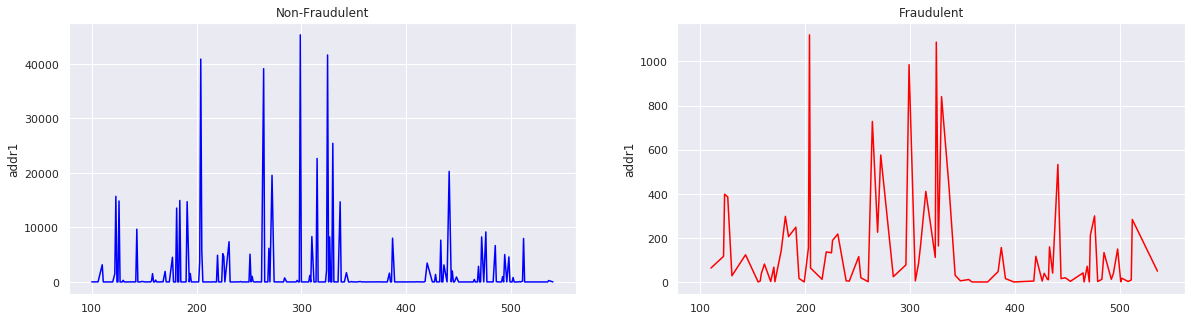

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=True)
sns.lineplot(x=df_train_NotFraud['addr1'].value_counts().index, y=df_train_NotFraud['addr1'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['addr1'].value_counts().index, y=df_train_Fraud['addr1'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

Billing region 'addr1' is spread out throughout the dataset for fraudulent and non fraudulent cases. Still regions aroud 200 and 300-340 have higher chances of fraud.

**Distribution of 'addr2'**

Text(0.5, 1.0, 'Fraudulent')

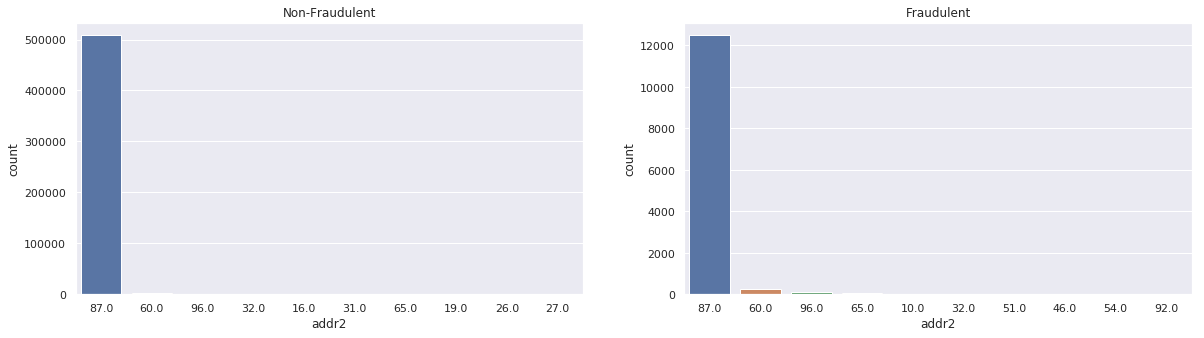

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.countplot(data=df_train_NotFraud,x='addr2',
              order=df_train_NotFraud.addr2.value_counts().iloc[:10].index,ax=ax[0]).set_title('Non-Fraudulent')
sns.countplot(data=df_train_Fraud,x='addr2',
              order=df_train_Fraud.addr2.value_counts().iloc[:10].index,ax=ax[1]).set_title('Fraudulent')

**Distribution of 'dist1'**

Text(0.5, 1.0, 'Fraudulent')

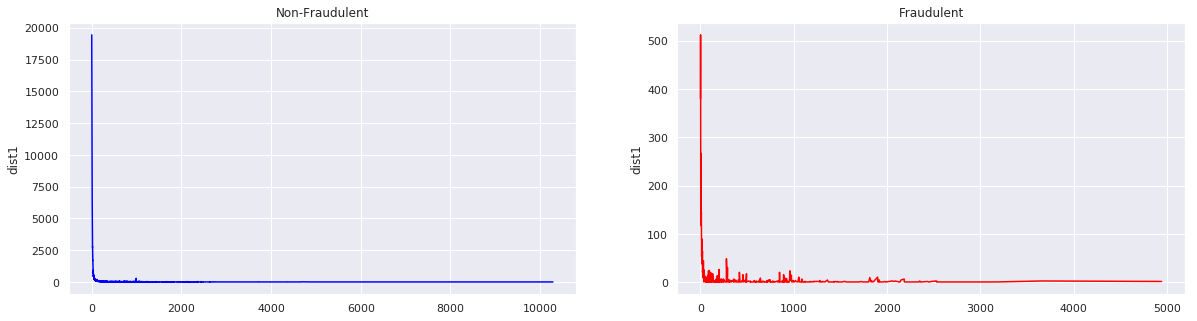

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(x=df_train_NotFraud['dist1'].value_counts().index, y=df_train_NotFraud['dist1'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['dist1'].value_counts().index, y=df_train_Fraud['dist1'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

**Distribution of 'dist2'**

Text(0.5, 1.0, 'Fraudulent')

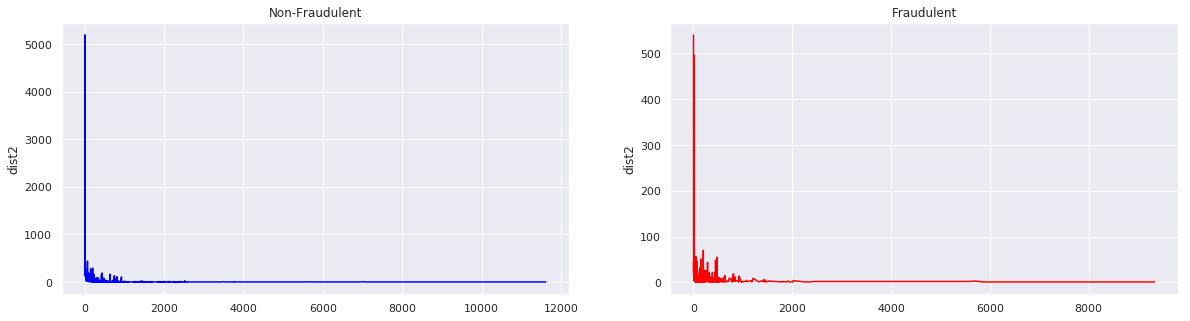

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(x=df_train_NotFraud['dist2'].value_counts().index, y=df_train_NotFraud['dist2'].value_counts(),markers=True, dashes=False,
             data=df_train_NotFraud,color='blue',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(x=df_train_Fraud['dist2'].value_counts().index, y=df_train_Fraud['dist2'].value_counts(),markers=True, dashes=False,
             data=df_train_Fraud,color='red',ax=ax[1]).set_title('Fraudulent')

In [0]:
del [[df_train_NotFraud,df_train_Fraud,df_complete_train_P1]]

Write your answer here

## Part 2 - Transaction Frequency

In [0]:
# TODO: code to generate the frequency graph
df_train.groupby('addr2')['TransactionID'].nunique().nlargest(5)

addr2
87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
Name: TransactionID, dtype: int64

The most frequent country code is 87.0

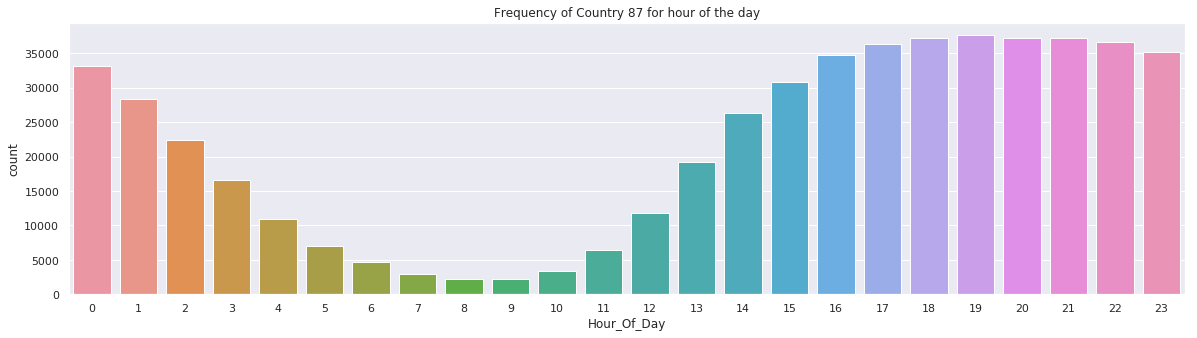

In [0]:
df_train_P2=df_train.copy()
df_train_P2['Hour_Of_Day'] = (df_train_P2['TransactionDT']//(3600))%24
plt.figure(figsize=(20,5))
sns.countplot(data=df_train_P2[df_train_P2.addr2 == 87.0],x='Hour_Of_Day').set_title('Frequency of Country 87 for hour of the day')
del [df_train_P2]

It can be observed that the frequecny of transactions for country 87 is high from 15th hour of the day to midngiht and midnight to 2nd hour of the next day.
After that it starts decreasing till 9th hour of the day and again picks up after that.

We are not sure if this the actually time zone of the country as it has been derived by a reference point from the dataset.

## Part 3 - Product Code

Text(0.5, 1.0, 'Transaction Amount below 500')

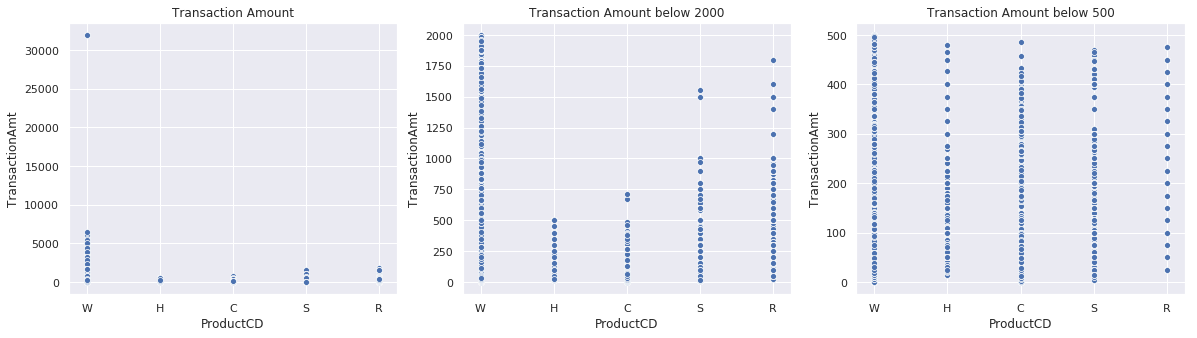

In [0]:
# TODO: code to analyze prices for different product codes
fig, ax =plt.subplots(1,3,figsize=(20,5),sharex=True)
sns.scatterplot(data=df_train,x='ProductCD',y='TransactionAmt',ax=ax[0]).set_title('Transaction Amount')
sns.scatterplot(data=df_train[df_train.TransactionAmt<2000],x='ProductCD',y='TransactionAmt',ax=ax[1]).set_title('Transaction Amount below 2000')
sns.scatterplot(data=df_train[df_train.TransactionAmt<500],x='ProductCD',y='TransactionAmt',ax=ax[2]).set_title('Transaction Amount below 500')

In [0]:
df_train['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [0]:
df_train.groupby('ProductCD', as_index=False)['TransactionAmt'].mean()

,ProductCD,TransactionAmt
0,C,42.872353
1,H,73.170058
2,R,168.306188
3,S,60.269487
4,W,153.158554


The first scatter plot consists of the entire dataset. Cost of all products other than 'W' are below 2000

In the second scatter plot, we have limited the cost upto 2000 so as to get a clear view of the products.
From this graph it is evident that product 'W' is most expensive.
Here, for cheaper products 'H' and 'C', have similar plots. So now we try to undetrstand these two products better by reducing the cost to 500 or below.

The third plot is limited to transaction amounts less than 500. From the above count of products we can see that 'C' has a very high count as compared to 'H'. The frequency of 'C' is approximately double of 'H'. This means that 'C' has larger number of products in the range upto 500 as compared to 'H'.

The mean transaction amount of 'C' as found above, is less than the mean transaction amount of 'H'. Therefore 'C' is the cheapest product.

**Most Expensive Product - W**

**Most Cheapest Product - C**


## Part 4 - Correlation Coefficient

Spearman
                TransactionAmt  Hour_Of_Day
TransactionAmt         1.00000      0.03832
Hour_Of_Day            0.03832      1.00000



Pearson
                TransactionAmt  Hour_Of_Day
TransactionAmt        1.000000     0.044532
Hour_Of_Day           0.044532     1.000000


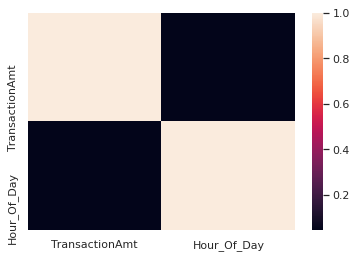

In [0]:
# TODO: code to calculate correlation coefficient
df_train_P4=df_train.copy()
df_train_P4['Hour_Of_Day'] = (df_train_P4['TransactionDT']//(3600))%24
corr_pearson = df_train_P4[['TransactionAmt','Hour_Of_Day']].corr()
corr_spearman = df_train_P4[['TransactionAmt','Hour_Of_Day']].corr(method='spearman')
sns.heatmap(corr_pearson)
print("Spearman")
print(corr_spearman)
print("\n\n\nPearson")
print(corr_pearson)

del [df_train_P4]

The Pearson Correlation = 0.044532

The Spearman Correlation = 0.0.03832

## Part 5 - Interesting Plot

In [0]:
# TODO: code to generate the plot here.
df_train_P5=df_train.copy()
df_train_P5=df_train_P5[['TransactionID',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card4',]]
df_train_P5['Hour_Of_Day'] = (df_train_P5['TransactionDT']//(3600))%24

df_train_NotFraud=df_train_P5.loc[df_train['isFraud'] == 0]
df_train_Fraud=df_train_P5.loc[df_train['isFraud'] == 1]


Text(0.5, 1.0, 'Fraudulent')

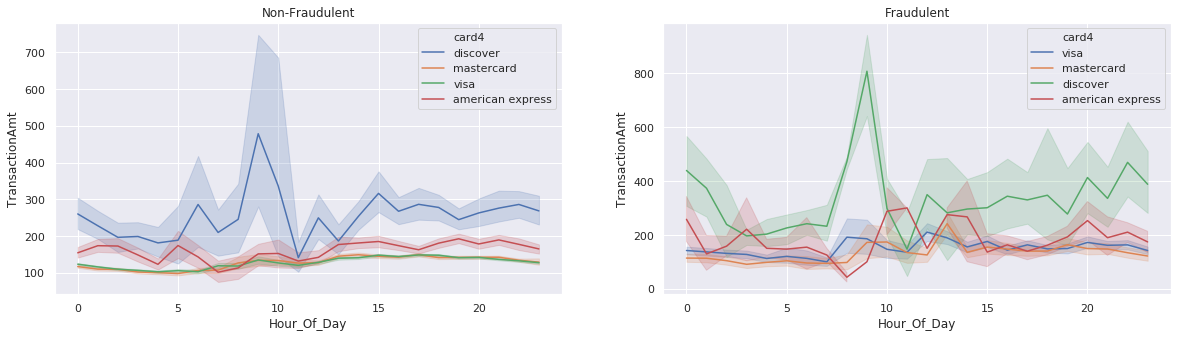

In [0]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)
sns.lineplot(y='TransactionAmt', x='Hour_Of_Day',markers=True, dashes=False,
             data=df_train_NotFraud,hue='card4',ax=ax[0]).set_title('Non-Fraudulent')
sns.lineplot(y='TransactionAmt', x='Hour_Of_Day',markers=True, dashes=False,
             data=df_train_Fraud,hue='card4',ax=ax[1]).set_title('Fraudulent')

In [0]:
del [[df_train_NotFraud,df_train_Fraud,df_train_P5]]

'visa' and 'mastercard' follow the same trend for fraudelent cases.

'american express' decreases rapidly for the 6th to 7th hour of the day and then increase over time for fraudelent cases.

'visa','mastercard','american express' follow the same trend for non-fraudelent cases.

There is a sharp increse during the 8th hour of the day to 9th hour of day (approximately) in the fraudlent cases for 'discover' card. 

## Part 6 - Prediction Model

In [0]:
# TODO: code for your final model
df_train_P6=df_train.copy()
df_train_P6['Hour_Of_Day'] = (df_train_P6['TransactionDT']//(3600))%24
df_train_P6=df_train_P6.iloc[: , list(range(0, 155))]
df_complete_train = pd.merge(df_train_P6, df_train_indentity, on='TransactionID', how='outer')

del [df_train_P6]

In [0]:
df_test_P6=df_test.copy()
df_test_P6['Hour_Of_Day'] = (df_test_P6['TransactionDT']//(3600))%24
df_test_P6=df_test_P6.iloc[: , list(range(0, 155))]
df_complete_test = pd.merge(df_test_P6, df_test_indentity, on='TransactionID', how='outer')

del [df_test_P6]

In [0]:
df_complete_train.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)

In [0]:
Test_T_ID=df_test['TransactionID']

df_complete_test.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo','V101'], axis=1, inplace=True)

In [0]:
df_complete_train.shape

(590540, 190)

In [0]:
df_complete_test.shape

(506691, 189)

In [0]:
# df_complete_test.columns.symmetric_difference(df_complete_train.columns)

In [0]:
X = df_complete_train[[col for col in df_complete_train.columns if col != 'isFraud']]
Y = df_complete_train['isFraud']

X.fillna(-1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [0]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score

In [0]:
cat_cols = X.dtypes==object
cat_cols = X.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [0]:
df_complete_test.fillna(-1,inplace=True)

cat_cols = df_complete_test.dtypes==object
cat_cols = df_complete_test.columns[cat_cols].tolist()

df_complete_test[cat_cols] = df_complete_test[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [0]:
print(X.shape)
print(df_complete_test.shape)

(590540, 189)
(506691, 189)


In [0]:
ss = preprocessing.StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
df_complete_test=pd.DataFrame(ss.fit_transform(df_complete_test),columns = df_complete_test.columns)

**Logistic Regression Model :**

Kaggle Score : 0.8318

In [0]:
# logreg = LogisticRegression()
# logreg.fit(X, Y)

# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(X, Y)))

# Y_pred = logreg.predict_proba(df_complete_test)[:,1]
# logregResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred}
# df_logregResult = pd.DataFrame(logregResult)
# df_logregResult.head()  
# df_logregResult.shape

# df_logregResult.to_csv('submissionLogReg_Final_SS.csv',index=False)

In [0]:
# Y_pred_roc = logreg.predict_proba(X)[:,1]
# print(roc_auc_score(Y,Y_pred_roc))

Accuracy of Logistic regression classifier on training set: 0.97

roc_auc_score = 0.8387757939040306

**KNN Model :**

Kaggle Score : 0.8408

In [0]:
# df_train_KNN_P6=df_train.copy()
# df_train_KNN_P6['Hour_Of_Day'] = (df_train_KNN_P6['TransactionDT']//(3600))%24
# df_train_KNN_P6=df_train_KNN_P6.iloc[: , list(range(0, 155))]
# df_complete__KNN_train = pd.merge(df_train_KNN_P6, df_train_indentity, on='TransactionID', how='outer')

# del [df_train_KNN_P6]

In [0]:
# X_KNN_NotFraud=df_complete__KNN_train.loc[df_complete__KNN_train['isFraud'] == 0]
# X_KNN_Fraud=df_complete__KNN_train.loc[df_complete__KNN_train['isFraud'] == 1]
# X_KNN_NotFraud=X_KNN_NotFraud.sample(n = 15000)
# KNN_merge=pd.concat([X_KNN_Fraud,X_KNN_NotFraud])

In [0]:
# X_KNN = KNN_merge[[col for col in KNN_merge.columns if col != 'isFraud']]
# Y_KNN = KNN_merge['isFraud']

# X_KNN.fillna(-1,inplace=True)

In [0]:
# X_KNN.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)


In [0]:
# cat_cols = X_KNN.dtypes==object
# cat_cols = X_KNN.columns[cat_cols].tolist()

# X_KNN[cat_cols] = X_KNN[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [0]:
# X_KNN = pd.DataFrame(ss.fit_transform(X_KNN),columns = X_KNN.columns)

In [0]:
# knn = KNeighborsClassifier(n_jobs=-1)
# knn.fit(X_KNN, Y_KNN)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(X_KNN, Y_KNN)))

# Y_pred_knn = knn.predict_proba(df_complete_test)[:,1]

# knnResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_knn}
# df_knnResult = pd.DataFrame(knnResult)
# df_knnResult.head()
# df_knnResult.shape


In [0]:
# df_knnResult.to_csv('submissionKNN_Final.csv,index=False)

In [0]:
# Y_pred_knn_roc = knn.predict_proba(X_KNN)[:,1]
# print(roc_auc_score(Y_KNN,Y_pred_knn_roc))

Accuracy of K-NN classifier on training set: 0.86

roc_auc_score = 0.9427717336946877

**XGBoost :**

Kaggle Score : 0.8480

In [0]:
# df_train_XGB_P6=df_train.copy()
# df_train_XGB_P6['Hour_Of_Day'] = (df_train_XGB_P6['TransactionDT']//(3600))%24
# df_train_XGB_P6=df_train_XGB_P6.iloc[: , list(range(0, 155))]
# df_complete__XGB_train = pd.merge(df_train_XGB_P6, df_train_indentity, on='TransactionID', how='outer')

# del [df_train_XGB_P6]
# df_complete__XGB_train.drop(['TransactionID','TransactionDT','P_emaildomain','R_emaildomain','DeviceInfo'], axis=1, inplace=True)

In [0]:
# X_XGB = df_complete__XGB_train[[col for col in df_complete__XGB_train.columns if col != 'isFraud']]
# Y_XGB = df_complete__XGB_train['isFraud']

# cat_cols = X_XGB.dtypes==object
# cat_cols = X_XGB.columns[cat_cols].tolist()

# X_XGB[cat_cols] = X_XGB[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

# X_XGB = pd.DataFrame(ss.fit_transform(X_XGB),columns = X_XGB.columns)


In [0]:
# xgb = XGBClassifier()
# xgb.fit(X_XGB, Y_XGB)

In [0]:
# print('Accuracy of XGB classifier on training set: {:.2f}'
#      .format(xgb.score(X_XGB, Y_XGB)))

In [0]:
# Y_pred_XGB=xgb.predict_proba(df_complete_test)[:,1]

# xgbResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_XGB}
# df_xgbResult = pd.DataFrame(xgbResult)
# df_xgbResult.head()  
# df_xgbResult.shape

# df_xgbResult.to_csv('submissionXGB_Final.csv',index=False)

In [0]:
# Y_pred_XGB_roc = xgb.predict_proba(X_XGB)[:,1]
# print(roc_auc_score(Y_XGB,Y_pred_XGB_roc))

Accuracy of XGB classifier on training set: 0.97

roc_auc_score = 0.8856252834801424

**LightGBM :**

Kaggle Score : 0.8781

In [0]:
# light_gbm=lgbm.LGBMClassifier()
# light_gbm.fit(X,Y)

In [0]:
# print('Accuracy of LightGBM classifier on training set: {:.2f}'
#      .format(light_gbm.score(X, Y)))

In [0]:
# Y_pred_lgbm=light_gbm.predict_proba(df_complete_test)[:,1]

# lgbmResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_lgbm}
# df_lgbmResult = pd.DataFrame(lgbmResult)
# df_lgbmResult.head()  
# df_lgbmResult.shape

# df_lgbmResult.to_csv('submissionLightGBM_Final.csv',index=False)

In [0]:
# Y_pred_lgbm_roc = light_gbm.predict_proba(X)[:,1]
# print(roc_auc_score(Y,Y_pred_lgbm_roc))

Accuracy of LightGBM classifier on training set: 0.97

roc_auc_score = 0.9402018161104588

**Random Forest Model :**

Kaggle Score : 0.8818

In [0]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X, Y);
print('Accuracy of RandomForest classifier on training set: {:.2f}'
     .format(rf.score(X, Y)))

Y_pred_RF=rf.predict_proba(df_complete_test)[:,1]

rfResult = {'TransactionID':Test_T_ID, 'isFraud':Y_pred_RF}
df_rfResult = pd.DataFrame(rfResult)
df_rfResult.head()  
df_rfResult.shape

df_rfResult.to_csv('submissionRF_Final.csv',index=False)

In [0]:
Y_pred_rf_roc = rf.predict_proba(X)[:,1]
print(roc_auc_score(Y,Y_pred_rf_roc))

Accuracy of RandomForest classifier on training set: 1.00

roc_auc_score = 0.9999999349489569

**Conclusion :**

For accuracy measurement, roc_auc_score was used as a metric. Very high values were observed because of imbalanced data.
KNN model was used with a reduced dataset for creating a balanced dataset otherwise it's processing would not complete.

The highest roc_auc_score and highest kaggle score was for Random Forest model. 

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/arnnav

Highest Rank: 4997

Score: 0.8818

Number of entries: 12

INCLUDE IMAGE OF YOUR KAGGLE RANKING

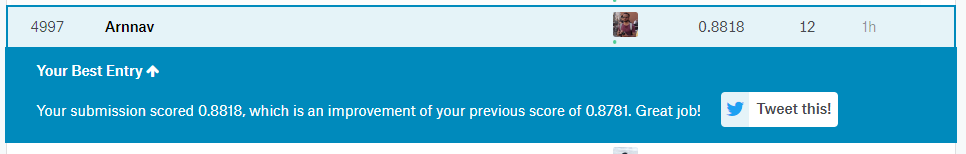

In [0]:
from google.colab import files
from IPython.display import Image
Image('/content/drive/My Drive/DSF/Homework_2/ieee-fraud-detection/Kaggle_Rank.png',width=800)